[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xZfngVIpCOpWisaRcftsDJ2JPWw1BrlV?usp=sharing)

# Image search

In this guide, we will delve into the realm of image search through the utilization of Sentence Transformers. This entails the mapping of images and text descriptions into a unified vector space, facilitating search and retrieval tasks based on textual descriptions.

To accomplish this, we'll leverage the power of the CLIP (Contrastive Language-Image Pretraining) model, a sophisticated AI model designed by OpenAI. Its core purpose is to cultivate a shared embedding space where both images and text can coexist harmoniously.

In [ ]:
!pip install -q sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.7 MB/s eta 0:00:00


In [ ]:
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from PIL import Image
import glob
import pickle
import zipfile
import copy
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Load the sentence transformer model
model_name = 'clip-ViT-B-32'
model = SentenceTransformer(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
import requests
from io import StringIO, BytesIO

def get_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    resized_image = img.resize((500, 500))

    return img, resized_image

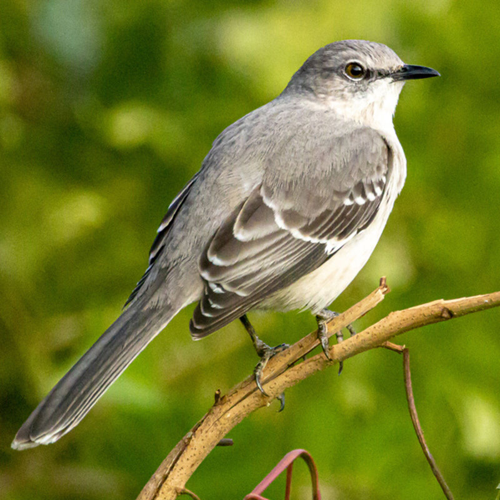

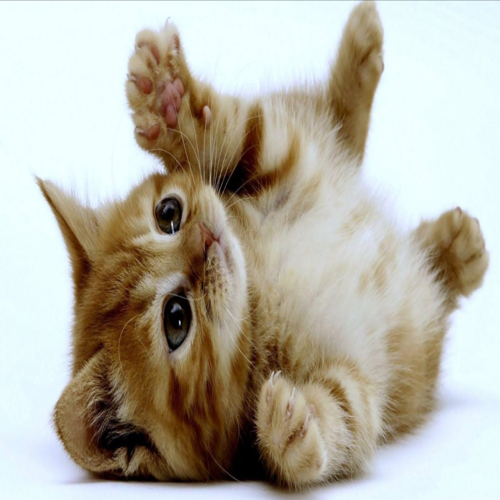

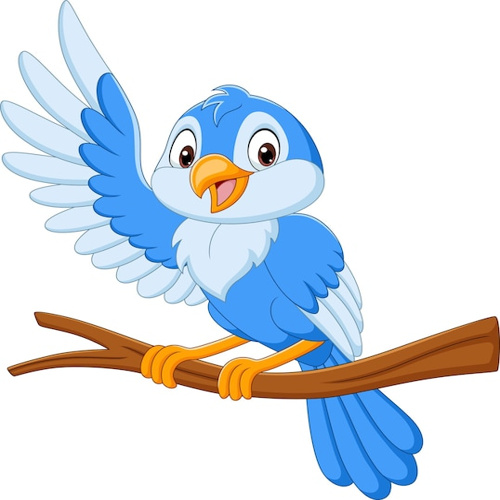

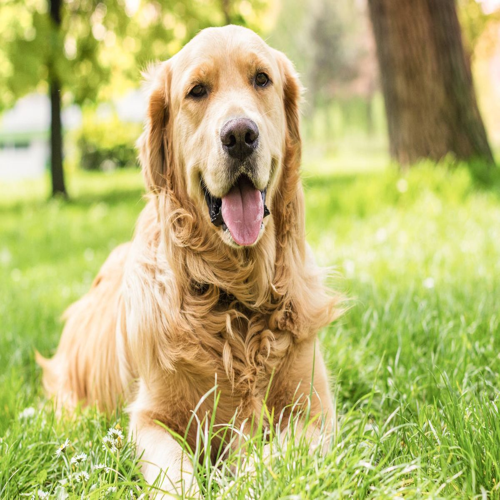

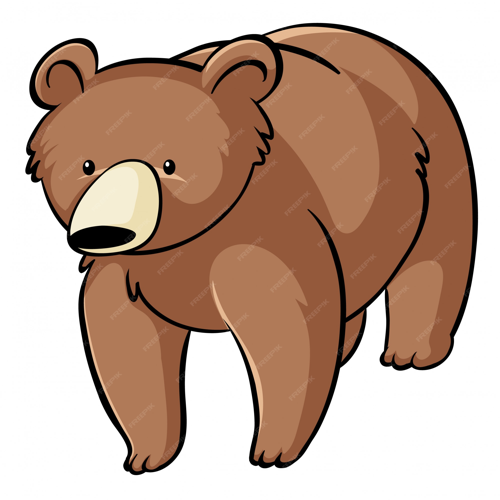

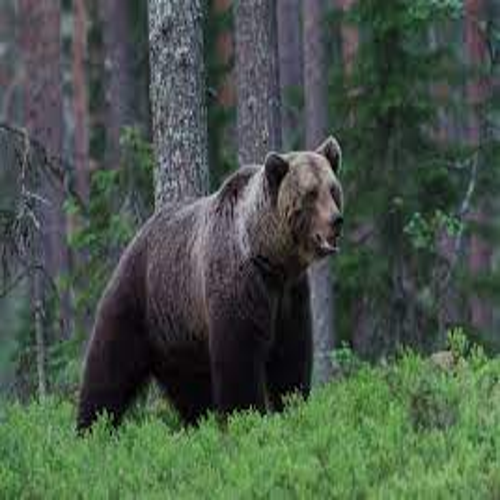

In [ ]:
# Try to get any image from google to test it
img_urls = [
    'https://www.nationalgeographic.com.es/medio/2023/03/17/cenzontle-pajaro_0b18132a_230317114903_800x800.jpg',
    'https://ca-times.brightspotcdn.com/dims4/default/796e6c9/2147483647/strip/true/crop/1970x1108+39+0/resize/1200x675!/quality/75/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F12%2Fa5%2F79e097ccf62312d18a025f22ce48%2Fhoyla-recuento-11-cosas-aman-gatos-top-001',
    'https://img.freepik.com/vector-premium/pajaro-azul-dibujos-animados-ondeando-rama-arbol_29190-5977.jpg',
    'https://images.ecestaticos.com/6uBjSmsBorRk6l_IHAxkBS1JCwE=/114x0:1997x1410/1200x900/filters:fill(white):format(jpg)/f.elconfidencial.com%2Foriginal%2F721%2F122%2F714%2F72112271431cb1078c3fe3e75ad5ab41.jpg',
    'https://img.freepik.com/vector-gratis/oso-grizzly-sobre-fondo-blanco_1308-38222.jpg?w=2000',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3GOndt4qWXFnoI4qpYs1TUeyczC7JPM5tPcPUrqFo8WfRCumSIOf4cJQjnmZjm3OVpgs&usqp=CAU'
]

images = []
resized_images = []

for url in img_urls:
    if True:
      image, resized_image = get_image_from_url(url)
      resized_images.append(resized_image)
      images.append(image)
      display(resized_image)
    else:
      print(f'The following URL is not available try another one: {url}')

In [ ]:
img_embeddings = model.encode(images,
                       batch_size=1,
                       convert_to_tensor=True,
                       show_progress_bar=True)
img_embeddings = img_embeddings.cpu()
print(img_embeddings.shape)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

torch.Size([6, 512])


In [ ]:
def image_search(query, model, img_embeddings, images, top_k=2):
    """
    define a function to perform image search, given a query and a list of image embeddings
    """
    query_embedding = model.encode([query])[0]
    similarities = cosine_similarity([query_embedding], img_embeddings)[0]
    indexes = np.argpartition(similarities, -top_k)[-top_k:]
    indexes = indexes[np.argsort(-similarities[indexes])]
    print(f"Input query: {query}")
    print()
    for ind, sim in zip(list(indexes), similarities[indexes].tolist()):
        print('_'*50)
        print(sim)
        display(images[ind])

Input query: Animal with winds

__________________________________________________
0.2412455976009369


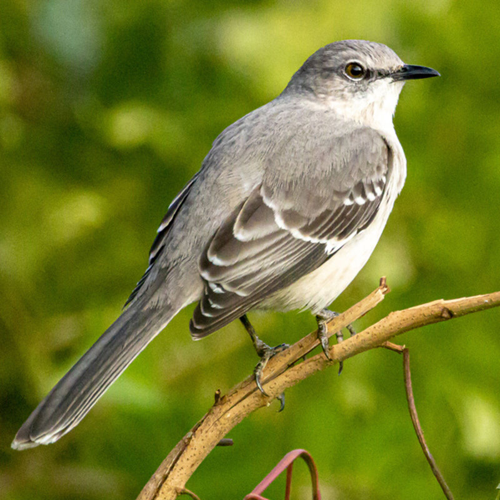

__________________________________________________
0.2395981401205063


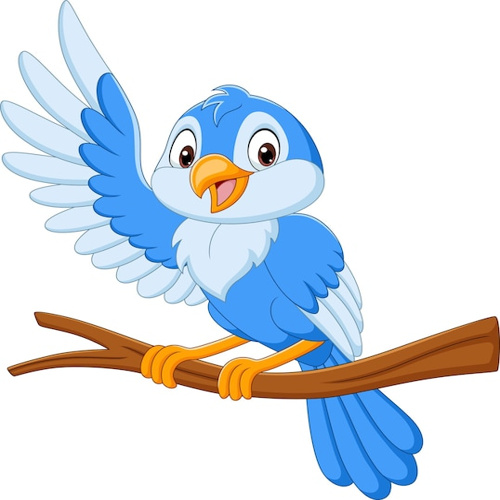

In [ ]:
image_search('Animal with winds', model, img_embeddings, resized_images, top_k=2)

Input query: Domestic animal

__________________________________________________
0.24395868182182312


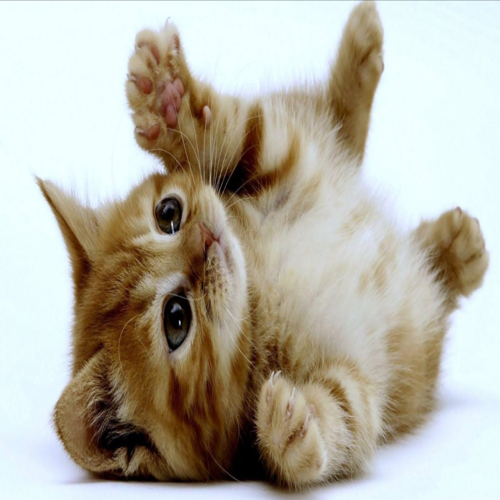

In [ ]:
image_search('Domestic animal', model, img_embeddings, resized_images, top_k=1)

Input query: Mammals animal

__________________________________________________
0.25722986459732056


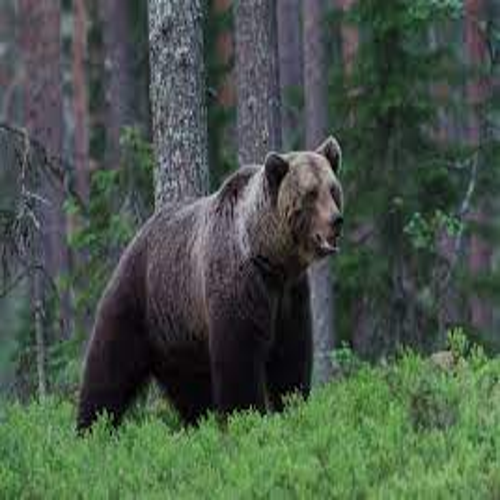

__________________________________________________
0.2541571259498596


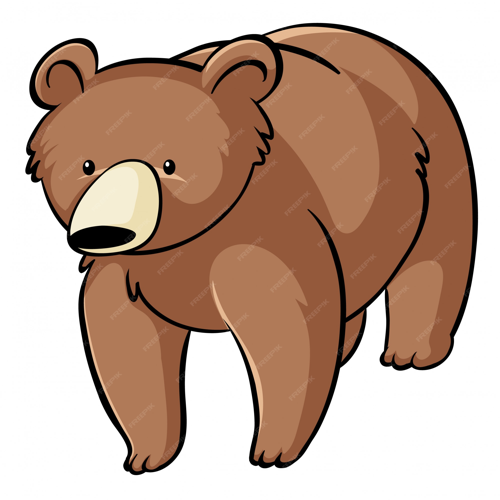

__________________________________________________
0.23568283021450043


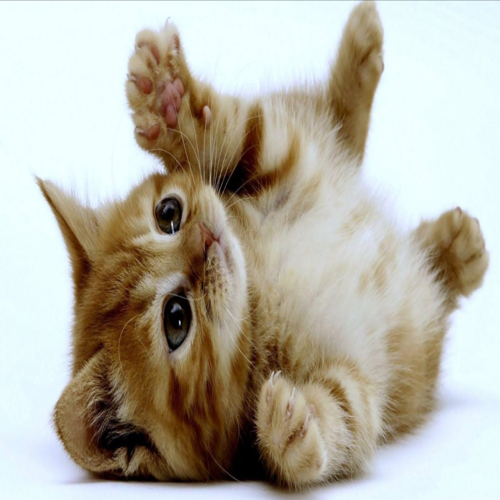

In [ ]:
image_search('Mammals animal', model, img_embeddings, resized_images, top_k=3)

Input query: Animal cartoons

__________________________________________________
0.24664220213890076


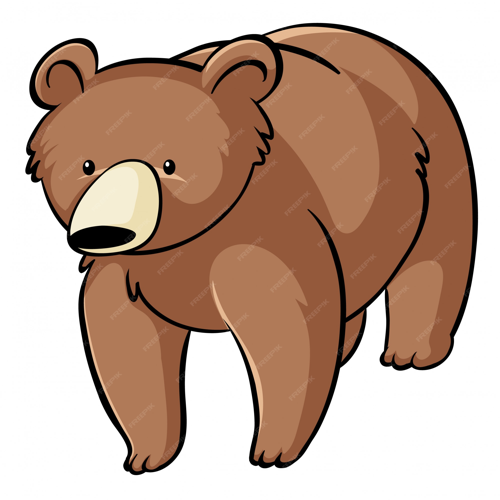

__________________________________________________
0.2405267208814621


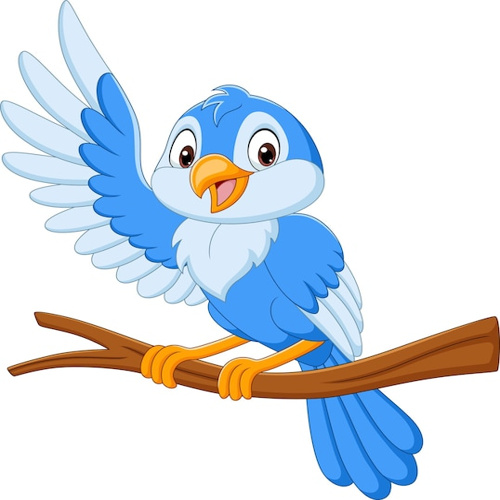

In [ ]:
image_search('Animal cartoons', model, img_embeddings, resized_images, top_k=2)